In [29]:
import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request

import matplotlib as mpl
import matplotlib.pyplot as pl

In [30]:
path='C:/Users/Rukhsana/Desktop/Heriot-watt university/Coursework/F21DL/FOOD-DATA-GROUP.csv'
df=pd.read_csv(path)

In [31]:
df = df.drop("food", axis=1)
features = df.drop("Caloric Value", axis=1).columns.tolist()
target = "Caloric Value"
# Drop target as it is not needed in clustering
df = df.drop(target, axis=1)

In [32]:
from sklearn.preprocessing import PowerTransformer

# Initialize the PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True)

# Transform the data
df_transformed = pt.fit_transform(df)

# Convert back to DataFrame
df = pd.DataFrame(df_transformed, columns=df.columns)

In [33]:
from scipy.stats import zscore

In [34]:
X = df[features]

# Calculate Z-scores for the features
z_scores = np.abs(zscore(X))

# Define a threshold for Z-scores
threshold = 3

# Find rows where all features have Z-scores greater than the threshold
outliers = (z_scores > threshold).any(axis=1)

# Remove rows where any feature's Z-score exceeds the threshold
X_clean_zscore = X[~outliers]

# Get the indices of the rows that are not outliers
valid_indices = X[~outliers].index

df = df.loc[valid_indices]


In [35]:
#selected features
df['Protein+Carbohydrates+Fat'] = df['Protein']+df['Carbohydrates']+df['Fat']
df['Total Fats'] = df['Polyunsaturated Fats'] + df['Saturated Fats'] + df['Monounsaturated Fats']

new_features = ['Protein+Carbohydrates+Fat', 'Total Fats']

selected_features = ['Nutrition Density', 'Zinc', 'Vitamin B3', 'Calcium', 'Sodium', 'Dietary Fiber', 'Vitamin C', 'Selenium', 'Protein+Carbohydrates+Fat', 'Total Fats']

X = df[selected_features]

The silhouette analysis is used to choose an optimal value for n_clusters

In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
cluster_range=list(range(2,8))
silhouette_avg=[] #Initialise an empty list to score the silhouette score

for num in cluster_range:
    kmeans=KMeans(n_clusters=num)
    kmeans.fit(X) #fit the kmeans model to the data

    cluster_labels=kmeans.predict(X)
    score=silhouette_score(X,cluster_labels) #Calculate the silhouette score 

    silhouette_avg.append(score) #Append the silhouette score to the list

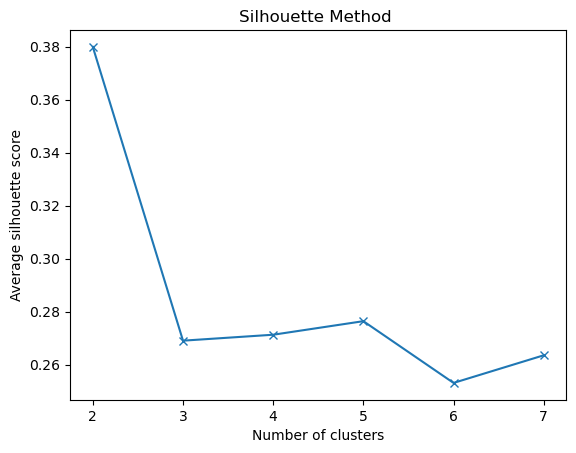

In [37]:
pl.plot(cluster_range, silhouette_avg, marker='x')
pl.xlabel('Number of clusters')
pl.ylabel('Average silhouette score')
pl.title('Silhouette Method ')
pl.show()

The plot demonstrates the relationship between number of clusters and average silhouette score for each cluster count. A high silhouette score indicates a better defined cluster.
The highest silhouette score is observed for cluster 2.